## Mercedes Benz Greener Manufacturing
### Type: Regression
#### Problem Statement: Reduce the time a Mercedes-Benz spends on the test bench

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

#### Import Dataset

In [2]:
df = pd.read_csv('train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB


In [3]:
df.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


#### Exploratory Data Analysis

In [4]:
y = df['y'].values

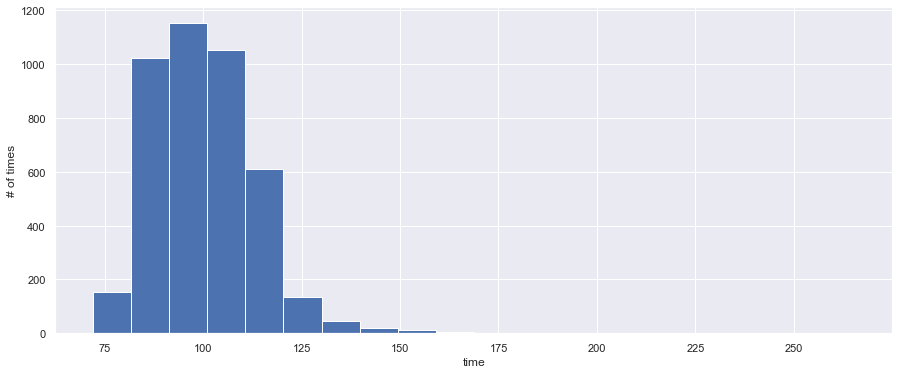

In [5]:
plt.figure(figsize=(15,6))
plt.hist(y,bins=20)
plt.xlabel('time')
plt.ylabel('# of times');

1. Distribution of output variable is pretty much centered around the mean
2. Target variable has some outliers on the right side

#### Checking whether things are changing over time

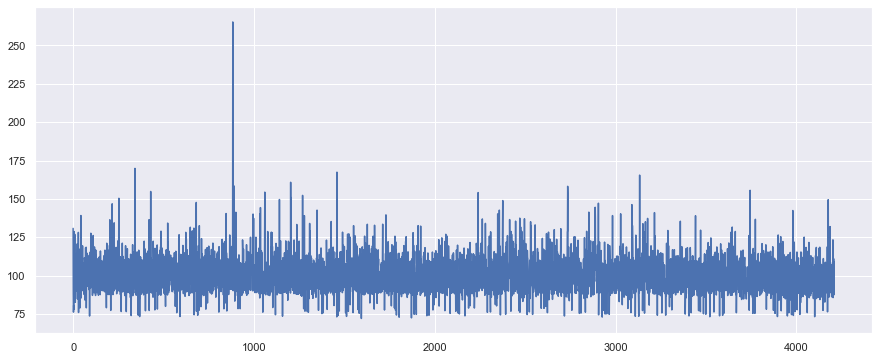

In [6]:
plt.figure(figsize=(15,6))
plt.plot(y);

Data is stationary

### Feature Analysis

In [7]:
cols = [c for c in df.columns if 'X' in c]
print(f'number of features {len(cols)}')
print(f'\nfeature types :\n{df[cols].dtypes.value_counts()}')

number of features 376

feature types :
int64     368
object      8
dtype: int64


#### Find Cardinality
1. Create a list of 3 lists
2. Iterate over columns
3. In iterator:
    a. find type of al lcolumns
    b. find # of unique values in each column
    c. if uniqueval = 1, assign in cnt[0], if 2 assign in cnt[1], esle assign in cnt[2]

In [8]:
cnt = [[],[],[]]
for c in cols:
    typ = df[c].dtype
    uniq = len(np.unique(df[c]))
    if uniq==1: cnt[0].append(c)
    elif (uniq==2 and typ == np.int64): cnt[1].append(c)
    else: cnt[2].append(c)

print(f'Constant Features{cnt[0]}\n\n Binary Features {cnt[1]}\n Categorical Features {cnt[2]}')        

Constant Features['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293', 'X297', 'X330', 'X347']

 Binary Features ['X10', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41', 'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51', 'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61', 'X62', 'X63', 'X64', 'X65', 'X66', 'X67', 'X68', 'X69', 'X70', 'X71', 'X73', 'X74', 'X75', 'X76', 'X77', 'X78', 'X79', 'X80', 'X81', 'X82', 'X83', 'X84', 'X85', 'X86', 'X87', 'X88', 'X89', 'X90', 'X91', 'X92', 'X94', 'X95', 'X96', 'X97', 'X98', 'X99', 'X100', 'X101', 'X102', 'X103', 'X104', 'X105', 'X106', 'X108', 'X109', 'X110', 'X111', 'X112', 'X113', 'X114', 'X115', 'X116', 'X117', 'X118', 'X119', 'X120', 'X122', 'X123', 'X124', 'X125', 'X126', 'X127', 'X128', 'X129', 'X130', 'X131', 'X132', 'X133', 'X134', 'X1

### Cleaning Data

In [9]:
dft = pd.read_csv('test.csv')

* If for any column(s), the variance is equal to zero, then you need to remove those variable(s).
* Check for null and unique values for test and train sets.
* Apply label encoder.

In [10]:
features = list(set(df.columns)-set(['ID','y']))

X_train = df[features]
y_train = df['y'].values
X_test = dft[features]
id_test = df['ID'].values

for col in features:
    cardinality = len(np.unique(X_train[col]))
    
    ## Dropping constant columns
    if cardinality == 1:
        X_train.drop(col,axis=1)
        X_test.drop(col,axis=1)
        
    #Label Encoding using ord
    if cardinality>2:
        mapper = lambda x: sum(ord(digit) for digit in x)
        X_train[col] = X_train[col].apply(mapper)
        X_test[col] = X_test[col].apply(mapper)

C:\Users\manoj\anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\manoj\anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [11]:
ord('V')

86

### Modelling with XG Boost before applying PCA

In [12]:
import xgboost as xgb
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

X_train_New, X_valid, y_train_New, y_valid = train_test_split(X_train,y_train,test_size=0.2,random_state=42)
d_train = xgb.DMatrix(X_train_New,label=y_train_New)
d_valid = xgb.DMatrix(X_valid,label=y_valid)
d_test = xgb.DMatrix(X_test)

params={}
params['Objective'] = 'reg:linear'
params['eta'] = 0.02
params['max_depth'] = 4

def xgb_r2score(preds,dtrain):
    labels = dtrain.get_label()
    return 'r2',r2_score(labels,preds)

watchlist = [(d_train,'Train'),(d_valid,'Validation')]

clf = xgb.train(params,d_train,1000,watchlist,early_stopping_rounds=50,
                feval=xgb_r2score,maximize=True,verbose_eval=10)

[14:01:18] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { Objective } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	Train-rmse:98.98858	Validation-rmse:98.87984	Train-r2:-59.48709	Validation-r2:-61.81546
Multiple eval metrics have been passed: 'Validation-r2' will be used for early stopping.

Will train until Validation-r2 hasn't improved in 50 rounds.
[10]	Train-rmse:81.05274	Validation-rmse:80.98148	Train-r2:-39.55346	Validation-r2:-41.13300
[20]	Train-rmse:66.42594	Validation-rmse:66.38055	Train-r2:-26.23755	Validation-r2:-27.30953
[30]	Train-rmse:54.51056	Validation-rmse:54.48060	Train-r2:-17.34230	Validation-r2:-18.06930
[40]	Train-rmse:44.81946	Validation-rmse:44.79547	Train-r2:-11.40012	Validation-r2:-11.8919

### Predictions

In [13]:
p_test = clf.predict(d_test)

pred = pd.DataFrame()

pred['ID'] = id_test
pred['y'] = p_test

In [14]:
pred.head(10)

,ID,y
0,0,87.082245
1,6,104.427322
2,7,89.121895
3,9,76.657997
4,13,111.150192
5,18,92.789383
6,24,110.989510
7,25,93.983223
8,27,115.976860
9,30,94.442657


### Dimentionality Reduction using PCA

In [15]:
from sklearn.decomposition import PCA
pca2 = PCA(n_components=40)
pca2_results_1 = pca2.fit_transform(X_train)

### XGBoost after applying PCA

In [16]:
X_train_pca, X_valid, y_train_pca, y_valid = train_test_split(pca2_results_1,y_train,test_size=0.2,random_state=42)
d_train = xgb.DMatrix(X_train_pca,label=y_train_pca)
d_valid = xgb.DMatrix(X_valid,label=y_valid)
d_test_pca = xgb.DMatrix(pca2_results_1)

watchlist = [(d_train,'Train'),(d_valid,'Validation')]

clf2 = xgb.train(params,d_train,1000,watchlist,early_stopping_rounds=50,
                feval=xgb_r2score,maximize=True,verbose_eval=10)

[14:01:25] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { Objective } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	Train-rmse:98.99559	Validation-rmse:98.88786	Train-r2:-59.49568	Validation-r2:-61.82566
Multiple eval metrics have been passed: 'Validation-r2' will be used for early stopping.

Will train until Validation-r2 hasn't improved in 50 rounds.
[10]	Train-rmse:81.13055	Validation-rmse:81.06931	Train-r2:-39.63137	Validation-r2:-41.22445
[20]	Train-rmse:66.56940	Validation-rmse:66.53451	Train-r2:-26.35532	Validation-r2:-27.44101
[30]	Train-rmse:54.71151	Validation-rmse:54.71440	Train-r2:-17.47779	Validation-r2:-18.23333
[40]	Train-rmse:45.07062	Validation-rmse:45.09584	Train-r2:-11.53949	Validation-r2:-12.0654

In [17]:
p_test_pca = clf2.predict(d_test_pca)

In [18]:
pred_pca = pd.DataFrame()

pred_pca['ID'] = id_test
pred_pca['y'] = p_test_pca
pred_pca.head(10)

,ID,y
0,0,112.389236
1,6,96.970299
2,7,78.907341
3,9,81.068672
4,13,80.515297
5,18,96.761711
6,24,97.718193
7,25,94.127716
8,27,110.189186
9,30,114.030663
